In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, load_iris
from sklearn.svm import SVC
import matplotlib.pyplot as plt

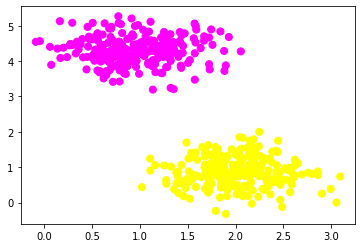

In [2]:
# creating datasets X containing n_samples
# Y containing two classes

X, Y = make_blobs(
    n_samples=500, centers=2,
    random_state=0, cluster_std=0.40
)


# plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
plt.show()

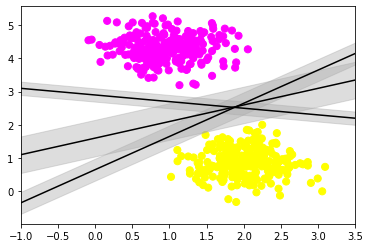

In [3]:
# creating linspace between -1 to 3.5

xfit = np.linspace(-1, 3.5)

# plotting scatter

plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')


# plot a line between the different sets of data

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:

    yfit = m * xfit + b

    plt.plot(xfit, yfit, '-k')

    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',

                     color='#AAAAAA', alpha=0.4)


plt.xlim(-1, 3.5)
plt.show()

In [4]:
# reading csv file and extracting class column to y.
iris = load_iris()
x = iris.data[:, :2]
y = iris.target
x.shape, y.shape

((150, 2), (150,))

In [5]:
svc = SVC(kernel='linear', C=1.0).fit(x, y)

In [6]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

In [7]:
z = svc.predict(np.c_[xx.ravel(), yy.ravel()])


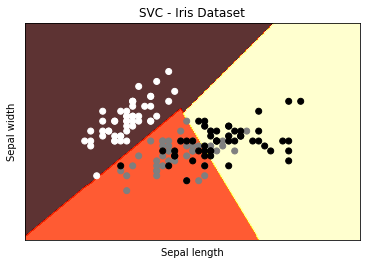

In [28]:
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.hot, alpha=0.8)

# Plot also the training points
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.binary)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVC - Iris Dataset')
plt.show()